# Exercise: Binary Classification with a Perceptron using TensorFlow


*  Task: Build and train a perceptron using TensorFlow for binary classification on a synthetic dataset



In [ ]:
#importing libraries to use
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#Step 1: Data Preparation
#Generate synthetic dataset
np.random.seed(42)

In [ ]:
#Number of samples per class
num_samples = 200

In [ ]:
#Generate class 0 data
class_0_mean = [2, 2]
class_0_cov = [[1, 0.5], [0.5, 1]]
class_0_data = np.random.multivariate_normal(class_0_mean, class_0_cov, num_samples)

In [ ]:
#Generate class 1 data
class_1_mean = [6, 6]
class_1_cov = [[1, -0.5], [-0.5, 1]]
class_1_data = np.random.multivariate_normal(class_1_mean, class_1_cov, num_samples)

In [ ]:
#Combine data from both classes
data = np.vstack((class_0_data, class_1_data))
labels = np.hstack((np.zeros(num_samples), np.ones(num_samples)))

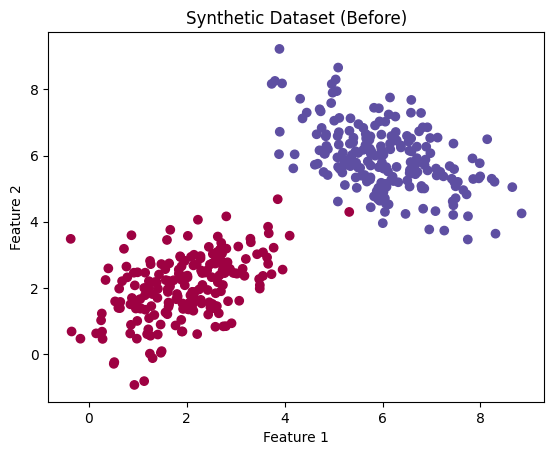

In [ ]:
#Visualize the dataset
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.Spectral)
plt.title("Synthetic Dataset (Before)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
#Split dataset into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)

Training data shape: (320, 2)
Training labels shape: (320,)
Test data shape: (80, 2)
Test labels shape: (80,)


In [ ]:
#Step 2: Model Building
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  #Could change the activation function
model.compile(loss='binary_crossentropy', optimizer='adam')  #Choosing optimiser and loss function

In [ ]:
#Step 3: Model Training
model.fit(train_data, train_labels, epochs=10, batch_size=32)

Epoch 1/10
10/10 [==============================] - 1s 3ms/step - loss: 0.9999
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9797
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.9598
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.9397
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9203
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.9008
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8818
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8633
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8449
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8281


In [ ]:
#Step 4: Visualization
#Generate a grid of points to visualize the decision boundary
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [ ]:
#Flatten the grid coordinates and predict class for each point
mesh_data = np.c_[xx.ravel(), yy.ravel()]
mesh_predictions = model.predict(mesh_data)
mesh_predictions = mesh_predictions.reshape(xx.shape)

431/431 [==============================] - 1s 1ms/step


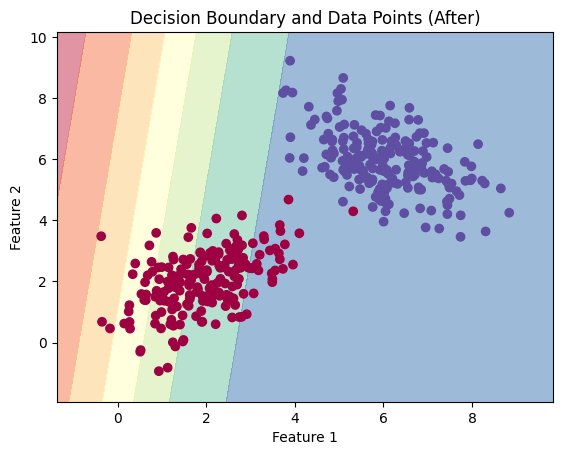

In [ ]:
#Plot the decision boundary and data points
plt.contourf(xx, yy, mesh_predictions, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.Spectral)
plt.title("Decision Boundary and Data Points (After)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()